# 3.1: K-Nearest Neighbors

## Guided stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

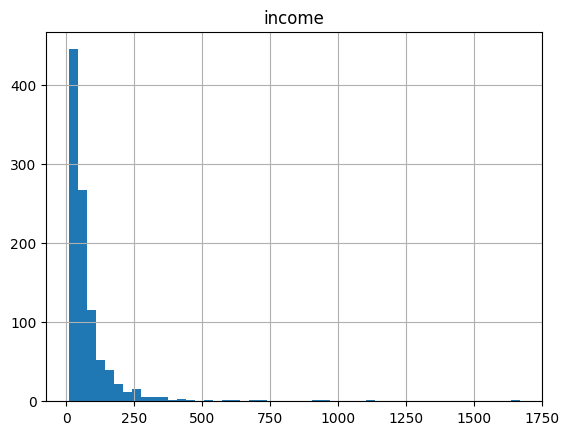

In [11]:
df.hist(column="income", bins=50)

In [12]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [20]:
features = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]].values
features[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [21]:
features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))
features[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [19]:
labels = df["custcat"].values
labels[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
trainX, testX, trainY, testY = train_test_split(features, labels, test_size=0.2, random_state=4)
print(f"Train set: {trainX.shape}, {trainY.shape}")
print(f"Test set: {testX.shape}, {testY.shape}")

Train set: (800, 11), (800,)
Test set: (200, 11), (200,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
GUIDED_NEIGHBOR_COUNT = 4
guidedModel = KNeighborsClassifier(n_neighbors=GUIDED_NEIGHBOR_COUNT).fit(trainX, trainY)

In [31]:
guidedYHat = guidedModel.predict(testX)
guidedYHat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [32]:
from sklearn import metrics

In [34]:
print("Train set accuracy: " + str(metrics.accuracy_score(trainY, guidedModel.predict(trainX))))
print("Test set accuracy: " + str(metrics.accuracy_score(testY, guidedYHat)))

Train set accuracy: 0.5475
Test set accuracy: 0.32


## Practice

In [41]:
# Can you build the model again, but this time with k=6?

NEIGHBOR_COUNT = 6
model = KNeighborsClassifier(n_neighbors=NEIGHBOR_COUNT).fit(trainX, trainY)

print(f"Train set accuracy: " + str(metrics.accuracy_score(trainY, model.predict(trainX))))
print(f"Test set accuracy: " + str(metrics.accuracy_score(testY, model.predict(testX))))

Train set accuracy: 0.51625
Test set accuracy: 0.31


## More guided stuff

In [43]:
NEIGHBOR_COUNT_MAX = 10

meanAccuracies = np.zeros((NEIGHBOR_COUNT_MAX))
stdAccuracies = np.zeros((NEIGHBOR_COUNT_MAX))

for neighborCount in range(1, NEIGHBOR_COUNT_MAX + 1):
    thisModel = KNeighborsClassifier(n_neighbors=neighborCount).fit(trainX, trainY)
    thisYHat = thisModel.predict(testX)

    meanAccuracies[neighborCount - 1] = metrics.accuracy_score(testY, thisYHat)
    stdAccuracies[neighborCount - 1] = np.std(thisYHat == testY) / np.sqrt(thisYHat.shape[0])

print(meanAccuracies)
print(stdAccuracies)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627 0.03324906]


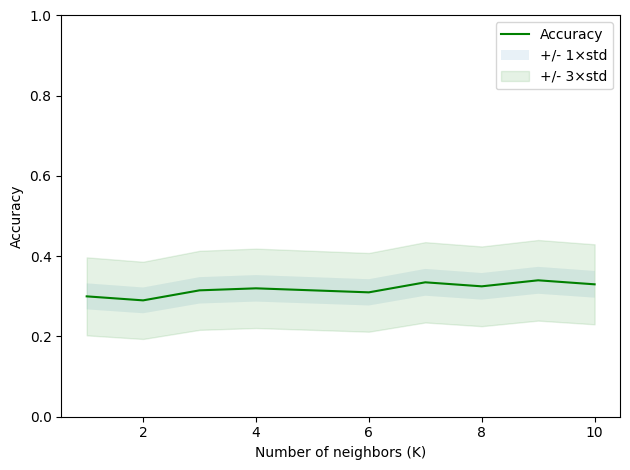

Most accuracy: 0.34 with K=9


In [58]:
plt.plot(range(1, NEIGHBOR_COUNT_MAX + 1), meanAccuracies, 'g')
plt.gca().set_ylim([0, 1])
plt.fill_between(range(1, NEIGHBOR_COUNT_MAX + 1), meanAccuracies - stdAccuracies, meanAccuracies + stdAccuracies, alpha=0.10)
plt.fill_between(range(1, NEIGHBOR_COUNT_MAX + 1), meanAccuracies - 3 * stdAccuracies, meanAccuracies + 3 * stdAccuracies, alpha=0.10, color="green")
plt.legend(("Accuracy", "+/- 1×std", "+/- 3×std"))
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors (K)")
plt.tight_layout()
plt.show()

print("Most accuracy: " + str(meanAccuracies.max()) + " with K=" + str(meanAccuracies.argmax() + 1))